In [23]:
import cv2
from PIL import Image
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

In [24]:

def imread_uint16_png(image_path, alignratio_path):
    """ This function loads a uint16 png image from the specified path and restore its original image range with
    the ratio stored in the specified alignratio.npy respective path.


    Args:
        image_path (str): Path to the uint16 png image
        alignratio_path (str): Path to the alignratio.npy file corresponding to the image

    Returns:
        np.ndarray (np.float32, (h,w,3)): Returns the RGB HDR image specified in image_path.

    """
    # Load the align_ratio variable and ensure is in np.float32 precision
    align_ratio = np.load(alignratio_path).astype(np.float32)
    # Load image without changing bit depth and normalize by align ratio
    return cv2.cvtColor(cv2.imread(image_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB) / align_ratio

def imwrite_uint16_png(image_path, image, alignratio_path):
    """ This function writes the hdr image as a uint16 png and stores its related align_ratio value in the specified paths.

        Args:
            image_path (str): Write path to the uint16 png image (needs to finish in .png, e.g. 0000.png)
            image (np.ndarray): HDR image in float format.
            alignratio_path (str): Write path to the align_ratio value (needs to finish in .npy, e.g. 0000_alignratio.npy)

        Returns:
            np.ndarray (np.float32, (h,w,3)): Returns the RGB HDR image specified in image_path.

    """
    align_ratio = (2 ** 16 - 1) / image.max()
    np.save(alignratio_path, align_ratio)
    uint16_image_gt = np.round(image * align_ratio).astype(np.uint16)
    cv2.imwrite(image_path, cv2.cvtColor(uint16_image_gt, cv2.COLOR_RGB2BGR))
    return None

In [25]:
img = imread_uint16_png("1046_gt.png","1046_alignratio.npy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


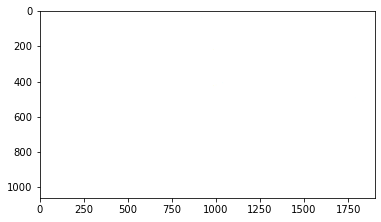

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [27]:
#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What are the pixel values
print(img[0,0])



6042000
(1060, 1900, 3)
float32
[15.5019455 15.389105  14.027237 ]


In [20]:
imwrite_uint16_png("hdr1.png",img,"1046_alignratio.npy")